# L5. Informed Search Strategies - PacMan World

Heuristic search plays a significant role in game AI. It uses rules of thumb, or heuristic functions, to efficiently navigate vast game state spaces and find optimal or near-optimal moves, outperforming brute-force methods.

PAC-MAN is one of the most popular game which also can be used as environment to test the "level of intelegence" of Problem-Solving Agents.

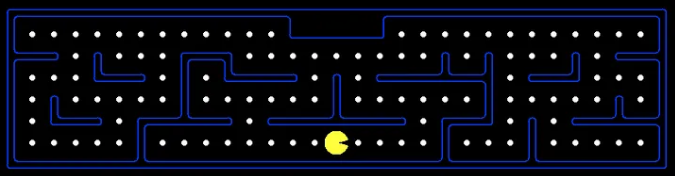

**Goal**: Help Pac-man Agent find its way through the maze. The Agent is required to visit every food pellet at least once on oits way to the exit.

**Techniques**: Heuristic Search - A*

## A* Search

The A* algorithm's efficiency comes from its smart evaluation of paths using three key components: **g(n), h(n)**, and **f(n)**. These components work together to guide the search process toward the most promising paths.

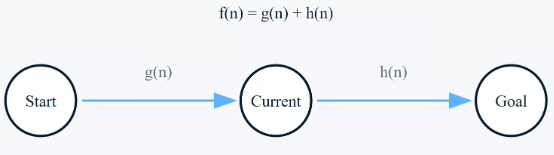

* **g(n)** = sum of edge costs from start to n

* heuristic function **h(n)** = estimate of lowest cost path from n to goal

### The heuristic 

In our example the **Euclidean distance** is used as a heuristic.

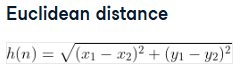



Let’s take a look at a quick graphic to help illustrate this.

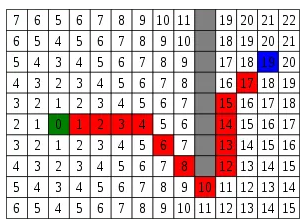

Let’s say node(0) is our starting position and node(19) is our end position. Let’s also say that our current node is at the the red square node(4).

So let’s calculate the distance. 

If we take a look we’ll see that if we go over 7 spaces and up 3 spaces, we’ve reached our end node (node(19)).

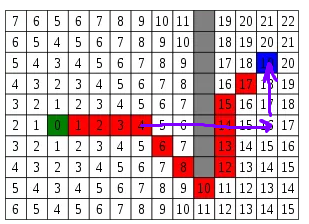

a² + b² = c². After we’ve applied this, we’ll see that currentNode.h = 7² + 3². Or currentNode.h = sqrt(58).


## Maze & State Space

Pacman World is a case of maze.

Mazes are a classic example of a state-space search problem in AI. 

* **State**: Each position in the maze (e.g., a specific grid cell) represents a state.
* **Actions**: The ***possible*** moves an agent can make from a given state, such as moving *up, down, left*, or *right*.
* **Goal**: The state where the agent needs to arrive, such as the maze's exit or the cell with a treasure.

       

### Maze generator

To generate a maze in this assignmenr you can use our simple Maze generator (from prev. Lab) as a base, and then customise it to get a PacMan World.

The `maze` can be represented as a `2D array`, where:
* 0 represents a wall , 
* and 1 represents an open path,
* 2 represents food

In [1]:
n=10

In [6]:
from src.mazeData import makeMaze

In [7]:
maze1=makeMaze(n)
maze1

array([[1, 1, 1, 1, 1, 0, 0, 1, 1, 1],
       [1, 1, 2, 1, 1, 2, 0, 1, 1, 1],
       [1, 1, 0, 2, 1, 1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1, 1, 2, 1, 1, 1],
       [1, 2, 1, 1, 1, 1, 1, 1, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 0, 1, 0],
       [1, 0, 1, 1, 1, 0, 2, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 2, 1, 1, 1],
       [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]])

Let's visualize our Maze as a Grid with Seaborn:
* a pink cell represent an initial state
* a green cell - a goal

In [8]:
from src.mazeData import draw_maze

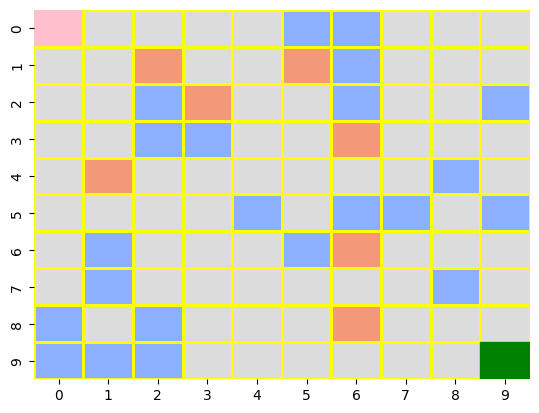

In [9]:
draw_maze(maze1)

Now we need to define AVAILABLE actions.

In [10]:
from src.mazeData import defineMazeAvailableActions

In [11]:
mazeAvalActs=defineMazeAvailableActions(maze1)
mazeAvalActs

{(0, 0): ['right', 'down'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right', 'down'],
 (0, 3): ['left', 'right', 'down'],
 (0, 4): ['left', 'down'],
 (0, 5): [],
 (0, 6): [],
 (0, 7): ['right', 'down'],
 (0, 8): ['left', 'right', 'down'],
 (0, 9): ['left', 'down'],
 (1, 0): ['up', 'right', 'down'],
 (1, 1): ['left', 'up', 'right', 'down'],
 (1, 2): ['left', 'up', 'right'],
 (1, 3): ['left', 'up', 'right', 'down'],
 (1, 4): ['left', 'up', 'right', 'down'],
 (1, 5): ['left', 'down'],
 (1, 6): [],
 (1, 7): ['up', 'right', 'down'],
 (1, 8): ['left', 'up', 'right', 'down'],
 (1, 9): ['left', 'up'],
 (2, 0): ['up', 'right', 'down'],
 (2, 1): ['left', 'up', 'down'],
 (2, 2): [],
 (2, 3): ['up', 'right'],
 (2, 4): ['left', 'up', 'right', 'down'],
 (2, 5): ['left', 'up', 'down'],
 (2, 6): [],
 (2, 7): ['up', 'right', 'down'],
 (2, 8): ['left', 'up', 'down'],
 (2, 9): [],
 (3, 0): ['up', 'right', 'down'],
 (3, 1): ['left', 'up', 'down'],
 (3, 2): [],
 (3, 3): [],
 (3, 4): ['up', 'r

In [17]:
mazeAvalActs[(4,1)] # correct: food is there, but it is possible to move L,U,R,D from it

['left', 'up', 'right', 'down']

In [18]:
maze1[4,1]

np.int64(2)

Next we need to define the **Transition (Transformation) Model (TM)**

Transition Model: Describes what each action does. RESULT(s, a) returns the state that results from performing action "a" in state "s".

In [19]:
from src.mazeData import makeMazeTransformationModel

Since the TM describes what each action does the set of available actions is used as a input for it.

In [20]:
maze1TM=makeMazeTransformationModel(mazeAvalActs)
maze1TM

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4), 'down': (1, 3)},
 (0, 4): {'left': (0, 3), 'down': (1, 4)},
 (0, 5): {},
 (0, 6): {},
 (0, 7): {'right': (0, 8), 'down': (1, 7)},
 (0, 8): {'left': (0, 7), 'right': (0, 9), 'down': (1, 8)},
 (0, 9): {'left': (0, 8), 'down': (1, 9)},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3)},
 (1, 3): {'left': (1, 2), 'up': (0, 3), 'right': (1, 4), 'down': (2, 3)},
 (1, 4): {'left': (1, 3), 'up': (0, 4), 'right': (1, 5), 'down': (2, 4)},
 (1, 5): {'left': (1, 4), 'down': (2, 5)},
 (1, 6): {},
 (1, 7): {'up': (0, 7), 'right': (1, 8), 'down': (2, 7)},
 (1, 8): {'left': (1, 7), 'up': (0, 8), 'right': (1, 9), 'down': (2, 8)},
 (1, 9): {'left': (1, 8), 'up': (0

The data above is our graph data to build the `MazeGraph`

### Maze Graph

In [21]:
from src.graphProblemClass import GraphProblem

Based on this dictionary we need to build a graph

However, we need to create the derived class - `mazeGraph`

In [22]:
from src.maze2025GraphClass import mazeGraph

In [23]:
mazeWorldGraph1 = mazeGraph(maze1TM)

In [24]:
mazeWorldGraph1.graph_dict

{(0, 0): {(0, 1): 0, (1, 0): 1},
 (0, 1): {(0, 0): 0, (0, 2): 0, (1, 1): 1},
 (0, 2): {(0, 1): 0, (0, 3): 0, (1, 2): 1},
 (0, 3): {(0, 2): 0, (0, 4): 0, (1, 3): 1},
 (0, 4): {(0, 3): 0, (1, 4): 1},
 (0, 7): {(0, 8): 0, (1, 7): 1},
 (0, 8): {(0, 7): 0, (0, 9): 0, (1, 8): 1},
 (0, 9): {(0, 8): 0, (1, 9): 1},
 (1, 0): {(0, 0): 2, (1, 1): 0, (2, 0): 1},
 (1, 1): {(1, 0): 0, (0, 1): 2, (1, 2): 0, (2, 1): 1},
 (1, 2): {(1, 1): 0, (0, 2): 2, (1, 3): 0},
 (1, 3): {(1, 2): 0, (0, 3): 2, (1, 4): 0, (2, 3): 1},
 (1, 4): {(1, 3): 0, (0, 4): 2, (1, 5): 0, (2, 4): 1},
 (1, 5): {(1, 4): 0, (2, 5): 1},
 (1, 7): {(0, 7): 2, (1, 8): 0, (2, 7): 1},
 (1, 8): {(1, 7): 0, (0, 8): 2, (1, 9): 0, (2, 8): 1},
 (1, 9): {(1, 8): 0, (0, 9): 2},
 (2, 0): {(1, 0): 2, (2, 1): 0, (3, 0): 1},
 (2, 1): {(2, 0): 0, (1, 1): 2, (3, 1): 1},
 (2, 3): {(1, 3): 2, (2, 4): 0},
 (2, 4): {(2, 3): 0, (1, 4): 2, (2, 5): 0, (3, 4): 1},
 (2, 5): {(2, 4): 0, (1, 5): 2, (3, 5): 1},
 (2, 7): {(1, 7): 2, (2, 8): 0, (3, 7): 1},
 (2, 8): {

In [25]:
mazeWorldGraph1.get((0,0))

{(0, 1): 0, (1, 0): 1}

In [26]:
from src.mazeData import mazeStatesLocations

In [27]:
list(maze1TM.keys())

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

In [28]:
mazeWorldGraph2 = mazeGraph(maze1TM, mazeStatesLocations(list(maze1TM.keys())))

In [29]:
mazeWorldGraph2.nodes()[:5]

[(4, 0), (4, 9), (5, 1), (8, 9), (9, 8)]

In [30]:
mazeWorldGraph2.locations

{(0, 0): (0, 0),
 (0, 1): (100, 0),
 (0, 2): (200, 0),
 (0, 3): (300, 0),
 (0, 4): (400, 0),
 (0, 5): (500, 0),
 (0, 6): (600, 0),
 (0, 7): (700, 0),
 (0, 8): (800, 0),
 (0, 9): (900, 0),
 (1, 0): (0, 100),
 (1, 1): (100, 100),
 (1, 2): (200, 100),
 (1, 3): (300, 100),
 (1, 4): (400, 100),
 (1, 5): (500, 100),
 (1, 6): (600, 100),
 (1, 7): (700, 100),
 (1, 8): (800, 100),
 (1, 9): (900, 100),
 (2, 0): (0, 200),
 (2, 1): (100, 200),
 (2, 2): (200, 200),
 (2, 3): (300, 200),
 (2, 4): (400, 200),
 (2, 5): (500, 200),
 (2, 6): (600, 200),
 (2, 7): (700, 200),
 (2, 8): (800, 200),
 (2, 9): (900, 200),
 (3, 0): (0, 300),
 (3, 1): (100, 300),
 (3, 2): (200, 300),
 (3, 3): (300, 300),
 (3, 4): (400, 300),
 (3, 5): (500, 300),
 (3, 6): (600, 300),
 (3, 7): (700, 300),
 (3, 8): (800, 300),
 (3, 9): (900, 300),
 (4, 0): (0, 400),
 (4, 1): (100, 400),
 (4, 2): (200, 400),
 (4, 3): (300, 400),
 (4, 4): (400, 400),
 (4, 5): (500, 400),
 (4, 6): (600, 400),
 (4, 7): (700, 400),
 (4, 8): (800, 400),
 

In [31]:
mazeWorldGraph2.get((0, 1), (0,2))

0

Let's try to show the graph of our Maze with PyVis

In [33]:
from pyvis.network import Network 

In [34]:
net_maze = Network( heading="Lab5. Examples of PacMan World",
                bgcolor ="#242020",
                font_color = "white",
                height = "750px",
                width = "100%",
                directed = True
) # do this


In [35]:
nodeColors={
    "wall":"red",
    "path": "white",
    "food":"yellow"
}

In [36]:
nodeColorsList=[]

for node in mazeWorldGraph2.origin.keys():
    if maze1[node[0],node[1]]==1:
        nodeColorsList.append(nodeColors["path"])
    elif maze1[node[0],node[1]]==2:
        nodeColorsList.append(nodeColors["food"])
    else:
        nodeColorsList.append(nodeColors["wall"])


In [37]:
nodes=["-".join(str(item) for item in el) for el in mazeWorldGraph2.origin.keys()]


In [38]:
x_coords = []
y_coords = []

for node in mazeWorldGraph2.origin.keys():
    x,y=mazeWorldGraph2.getLocation(node)
    x_coords.append(x)
    y_coords.append(y)



In [39]:
sizes=[10]*len(nodes)

In [40]:
#hidden labels, and hover titles
net_maze.add_nodes(nodes, color=nodeColorsList, x=x_coords, y=y_coords, size=sizes, title=nodes)

In [41]:
for node in net_maze.nodes:
    node['label']=''

In [42]:
net_maze.nodes

[{'color': 'white',
  'x': 0,
  'y': 0,
  'size': 10,
  'title': '0-0',
  'id': '0-0',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 100,
  'y': 0,
  'size': 10,
  'title': '0-1',
  'id': '0-1',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 200,
  'y': 0,
  'size': 10,
  'title': '0-2',
  'id': '0-2',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 300,
  'y': 0,
  'size': 10,
  'title': '0-3',
  'id': '0-3',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'white',
  'x': 400,
  'y': 0,
  'size': 10,
  'title': '0-4',
  'id': '0-4',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'red',
  'x': 500,
  'y': 0,
  'size': 10,
  'title': '0-5',
  'id': '0-5',
  'label': '',
  'shape': 'dot',
  'font': {'color': 'white'}},
 {'color': 'red',
  'x': 600,
  'y': 0,
  'size': 10,
  'title': '0-6',
  'id': '0-6',

In [43]:
mazeWorldGraph2.origin[(0,0)]

{'right': (0, 1), 'down': (1, 0)}

In [44]:
from src.mazeData import intTupleTostr

In [45]:
intTupleTostr((0,0))

'0-0'

In [46]:
mazeWorldGraph2.origin

{(0, 0): {'right': (0, 1), 'down': (1, 0)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'right': (0, 4), 'down': (1, 3)},
 (0, 4): {'left': (0, 3), 'down': (1, 4)},
 (0, 5): {},
 (0, 6): {},
 (0, 7): {'right': (0, 8), 'down': (1, 7)},
 (0, 8): {'left': (0, 7), 'right': (0, 9), 'down': (1, 8)},
 (0, 9): {'left': (0, 8), 'down': (1, 9)},
 (1, 0): {'up': (0, 0), 'right': (1, 1), 'down': (2, 0)},
 (1, 1): {'left': (1, 0), 'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3)},
 (1, 3): {'left': (1, 2), 'up': (0, 3), 'right': (1, 4), 'down': (2, 3)},
 (1, 4): {'left': (1, 3), 'up': (0, 4), 'right': (1, 5), 'down': (2, 4)},
 (1, 5): {'left': (1, 4), 'down': (2, 5)},
 (1, 6): {},
 (1, 7): {'up': (0, 7), 'right': (1, 8), 'down': (2, 7)},
 (1, 8): {'left': (1, 7), 'up': (0, 8), 'right': (1, 9), 'down': (2, 8)},
 (1, 9): {'left': (1, 8), 'up': (0

In [47]:
edge_weights = {(intTupleTostr(k), intTupleTostr(v2)) : k2 for k, v in mazeWorldGraph2.origin.items() for k2, v2 in v.items()}#actions
edge_weights

{('0-0', '0-1'): 'right',
 ('0-0', '1-0'): 'down',
 ('0-1', '0-0'): 'left',
 ('0-1', '0-2'): 'right',
 ('0-1', '1-1'): 'down',
 ('0-2', '0-1'): 'left',
 ('0-2', '0-3'): 'right',
 ('0-2', '1-2'): 'down',
 ('0-3', '0-2'): 'left',
 ('0-3', '0-4'): 'right',
 ('0-3', '1-3'): 'down',
 ('0-4', '0-3'): 'left',
 ('0-4', '1-4'): 'down',
 ('0-7', '0-8'): 'right',
 ('0-7', '1-7'): 'down',
 ('0-8', '0-7'): 'left',
 ('0-8', '0-9'): 'right',
 ('0-8', '1-8'): 'down',
 ('0-9', '0-8'): 'left',
 ('0-9', '1-9'): 'down',
 ('1-0', '0-0'): 'up',
 ('1-0', '1-1'): 'right',
 ('1-0', '2-0'): 'down',
 ('1-1', '1-0'): 'left',
 ('1-1', '0-1'): 'up',
 ('1-1', '1-2'): 'right',
 ('1-1', '2-1'): 'down',
 ('1-2', '1-1'): 'left',
 ('1-2', '0-2'): 'up',
 ('1-2', '1-3'): 'right',
 ('1-3', '1-2'): 'left',
 ('1-3', '0-3'): 'up',
 ('1-3', '1-4'): 'right',
 ('1-3', '2-3'): 'down',
 ('1-4', '1-3'): 'left',
 ('1-4', '0-4'): 'up',
 ('1-4', '1-5'): 'right',
 ('1-4', '2-4'): 'down',
 ('1-5', '1-4'): 'left',
 ('1-5', '2-5'): 'down',

In [48]:
edges=[]

for node_source in mazeWorldGraph2.nodes():
    for node_target, action in mazeWorldGraph2.get(node_source).items():
        #node_target or node_source is a tuple -> convert to str
        if (intTupleTostr(node_source),intTupleTostr(node_target)) not in edges:
            net_maze.add_edge(intTupleTostr(node_source),intTupleTostr(node_target), title=edge_weights[(intTupleTostr(node_source),intTupleTostr(node_target))], smooth=True, lable="")
            edges.append((intTupleTostr(node_source),intTupleTostr(node_target)))

In [49]:
('1-0','0-0') in edges

True

In [51]:
('0-0','1-0') in edges

True

In [ ]:
# edges=[]

# for node_source in mazeWorldGraph2.nodes():
#     for node_target, action in mazeWorldGraph2.get(node_source).items():
#         #node_target or node_source is a tuple -> convert to str
#         if (intTupleTostr(node_source),intTupleTostr(node_target)) not in edges and (intTupleTostr(node_target), intTupleTostr(node_source)):
#             net_maze.add_edge(intTupleTostr(node_source),intTupleTostr(node_target), label=edge_weights[(intTupleTostr(node_source),intTupleTostr(node_target))])
#             edges.append((intTupleTostr(node_source),intTupleTostr(node_target)))
            



In [52]:

# Enable dynamic edges for separate curved arrows.
#net_maze.set_edge_smooth('dynamic')
net_maze.toggle_physics(False)
net_maze.show("graph1.html", notebook=False)

graph1.html


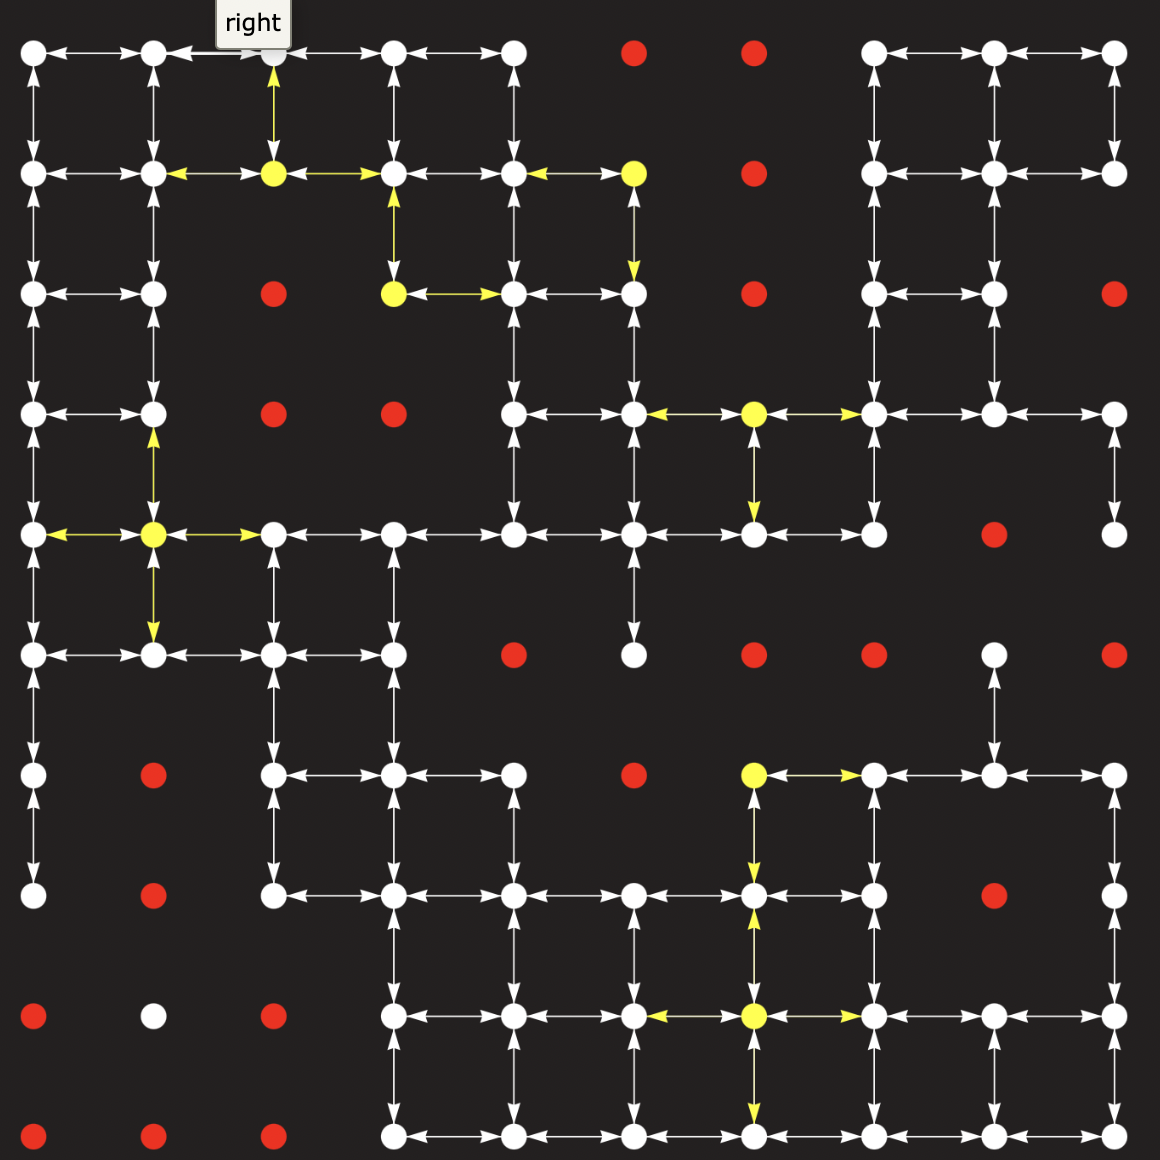

### Maze Problem formulation

Explore the derived *class MazeProblem(Problem)* for our Maze World example

In [53]:
from src.mazeProblemClass import MazeProblem

In [56]:
initState, goalState=(0,1),(1,2)

In [55]:
mp1=MazeProblem(initState,goalState,mazeWorldGraph2)

In [57]:
testState=(0,2)

In [58]:
mp1.actions(testState)

['left', 'right', 'down']

Let's check that the Euclidean distance between one and two dimensional points (a start & a goal) calculated correctly

In [59]:
from src.nodeClass import Node

In [60]:
import math

In [61]:
node = Node(mp1.initial)
print(node.path_cost+round(math.dist(node.state, mp1.goal),2)) 

1.41


## Problem Solving Agent in PacMan World

We also need to develop  the `A_StarSearchAgentProgram` to process Pacman World with A* algorithm.

In [108]:
from src.PS_agentPrograms import A_StarSearchAgentProgram

Now we need to create the instance of the A* based on Euclidean distance used for h(n)

In [138]:
f1=A_StarSearchAgentProgram(math.dist)

Check how it works with our instance of the Pacman world

In [139]:
f1(mp1)

[(1.414, <Node (0, 1)>)]
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
[(1.0, <Node (0, 2)>), (2.236, <Node (0, 0)>), (2.0, <Node (1, 1)>)]
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
[(1.0, <Node (1, 2)>), (1.414, <Node (0, 3)>), (2.0, <Node (1, 1)>), (2.236, <Node (0, 0)>)]
The node (1, 2) is extracted from frontier:
We have found our goal: (1, 2)


<Node (1, 2)>

Perfect! We are ready to create the PS PacMan Agent based on this AP.

In [155]:
from src.agents import ProblemSolvingMazeAgentAstar

In [156]:
Astar_PacManAgent1=ProblemSolvingMazeAgentAstar(initState,mazeWorldGraph2,goalState)

In [157]:
Astar_PacManAgent1.goal

(1, 2)

In [134]:
testNode=(0,0)

In [158]:
Astar_PacManAgent1.program(mp1)

TypeError: 'NoneType' object is not callable

In [96]:
Astar_PacManAgent1(testNode)

TypeError: 'NoneType' object is not callable

!!!!!!!!!!!!!!!!!!!!!

Our Agent uses BFS as a search algorithm 

With **BFS** we choose a node, n, with minimum value of some evaluation function, f(n).

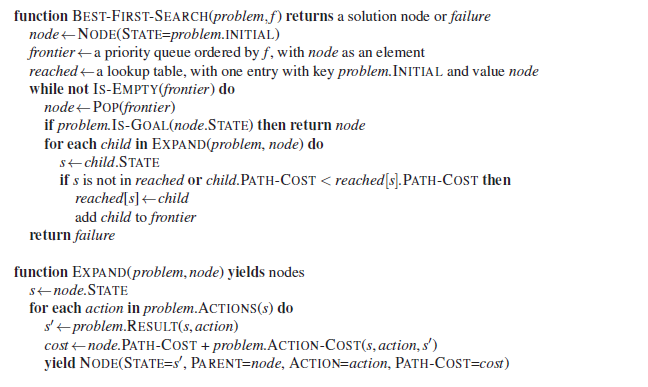

Let's create the environment for our Maze

In [60]:
from src.naigationEnvironmentClass import MazeNavigationEnvironment

In [102]:
maze_Env1=MazeNavigationEnvironment(mazeWorldGraph)

In [88]:
maze_Env1.status.graph_dict

{(0, 0): {(0, 1): 1, (1, 0): 1},
 (0, 1): {(0, 0): 1, (0, 2): 1, (1, 1): 1},
 (0, 2): {(0, 1): 1, (0, 3): 1, (1, 2): 1},
 (0, 3): {(0, 2): 1, (1, 3): 1},
 (1, 0): {(0, 0): 1, (1, 1): 1, (2, 0): 1},
 (1, 1): {(1, 0): 1, (0, 1): 1, (1, 2): 1, (2, 1): 1},
 (1, 2): {(1, 1): 1, (0, 2): 1, (1, 3): 1, (2, 2): 1},
 (1, 3): {(1, 2): 1, (0, 3): 1},
 (2, 0): {(1, 0): 1, (2, 1): 1, (3, 0): 1},
 (2, 1): {(2, 0): 1, (1, 1): 1, (2, 2): 1, (3, 1): 1},
 (2, 2): {(2, 1): 1, (1, 2): 1},
 (3, 0): {(2, 0): 1, (3, 1): 1},
 (3, 1): {(3, 0): 1, (2, 1): 1}}

In [89]:
BFS_MazeAgent2=ProblemSolvingMazeAgentBFS(initState,mazeWorldGraph,goalState)

In [90]:
BFS_MazeAgent2.performance

13

In [91]:
print(initState,goalState)

(0, 1) (0, 3)


In [92]:
intTupleTostr(goalState)

'0-3'

In [72]:
nodeColors

{'wall': 'red', 'path': 'white'}

In [74]:
nodeColors.setdefault('goal', "green")
nodeColors.setdefault('init', "gold")
nodeColors

{'wall': 'red', 'path': 'white', 'goal': 'green', 'init': 'gold'}

In [75]:
for node in net_maze.nodes:
    if node['id']==intTupleTostr(goalState):
        node['color']=nodeColors['goal']
    elif node['id']==intTupleTostr(initState):
        node['color']=nodeColors['init']

In [76]:
net_maze.show("graphMaze1.html", notebook=False)

graphMaze1.html


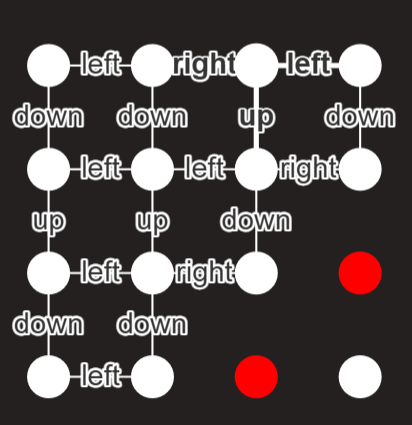  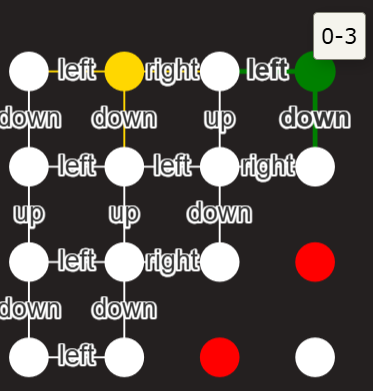

**!!!** As you can see the visualization of our Maze (above) is not complete enough (not all available actions are visible).
**You need to resolve this in your implementation.**

When we add the PS Agent into the Nav.Env. it should run its call() method 

In [93]:
maze_Env1.add_thing(BFS_MazeAgent2)

The <Node (0, 1)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 0)> is being pushed to frontier ...
The child <Node (0, 2)> is being pushed to frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The <Node (0, 0)> is being extracted from frontier ...
The child <Node (1, 0)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The child <Node (1, 2)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!
Solution (a sequence of actions) from the initial state to a goal: ['right', 'right']
The Agent in (0, 1) with performance 13


In [94]:
maze_Env1.step()

Agent decided to do right.
Agent in right with performance = 12


In [95]:
maze_Env1.step()

Agent decided to do right.
Agent in right with performance = 11
Agent reached all goals


In [96]:
maze_Env1.step()

There is no one here who could work...


In [97]:
testState=(2,2)

In [103]:
BFSnavAgent3=ProblemSolvingMazeAgentBFS(testState,mazeWorldGraph,goalState)

In [99]:
BFSnavAgent3.state

(2, 2)

In [104]:
maze_Env1.add_thing(BFSnavAgent3)

The <Node (2, 2)> is being pushed to frontier ...
The <Node (2, 2)> is being extracted from frontier ...
The child <Node (2, 1)> is being pushed to frontier ...
The child <Node (1, 2)> is being pushed to frontier ...
The <Node (1, 2)> is being extracted from frontier ...
The child <Node (1, 1)> is being pushed to frontier ...
The child <Node (0, 2)> is being pushed to frontier ...
The child <Node (1, 3)> is being pushed to frontier ...
The <Node (0, 2)> is being extracted from frontier ...
The child <Node (0, 1)> is being pushed to frontier ...
The child <Node (0, 3)> is being pushed to frontier ...
The <Node (0, 1)> is being extracted from frontier ...
The child <Node (0, 0)> is being pushed to frontier ...
The <Node (0, 0)> is being extracted from frontier ...
The child <Node (1, 0)> is being pushed to frontier ...
The <Node (0, 3)> is being extracted from frontier ...
We have found our goal:  <Node (0, 3)>!
Solution (a sequence of actions) from the initial state to a goal: ['up', 'u

In [105]:
maze_Env1.run()

step 1:
Agent decided to do up.
Agent in up with performance = 12
step 2:
Agent decided to do up.
Agent in up with performance = 11
step 3:
Agent decided to do right.
Agent in right with performance = 10
Agent reached all goals


## Task. Asteroid Maze & Satellites

In this assignment a Satellite (Agent) is trying to navigate (find the shortest route from a starting cell to a target cell) in Space (asteroid maze environment).

The Satellite Agent must avoid obstacles - asteroids ("walls" in classic maze).

1. Model a Asteroid Maze Problem by having a node for a starting point, a finishing point, and all the points in the maze where more than one path can be taken, and then connecting the vertices according to the paths in the maze.

Generate a random Maze with size (7,7) as a Numpy matrix, which includes 25% of occupied cells (with asteroids).and 10% of enemies.

Visualize the this asteroid maze environment.

2. A framework consists of an Asteroid Environment and an Satellite Agent which acts in this environment. In our case the environment is a classical square maze with 3 types of cells:

* available to visit it (but can include an enemy spaceship),
* occupied with an asteroid,
* target.

An enemy spaceship is a subclass of Thing. It has a power attirbute (values are randomly generated in the range 10%-40% of the N of nodes in the state space).

The Sattelite can start from any free cell and is allowed to travel on the free cells only.

Our agent's sole purpose in life is to land on Earth

We have exactly 4 actions which we must encode as integers 0-3:

* 0 - left
* 1 - up
* 2 - right
* 3 - down

Develop a transition model according to the description above.


The locations of enemy spaceships are unknown. 

However, if an enemy ship, with at least twice the power of the Satellite Agent preformance, is at the Agent's current location, the enemy ship will capture the Satellite (the Agent will die).

When a Satellite Agent encounters an enemy ship, it will activate a "defense" mode (if its performance allows it, see the rule above), which consumes 10% of its current performance. While in "defense" mode, the agent can continue moving through the cell containing the enemy.

3. Implement 2 Satellite Agents (based on `Uniform-cost` & on `iterative DLS`) and add both in the same start cell.

For **Uniform-cost Search** apply BEST-FIRST-SEARCH with PATH-COST as the evaluation function.

PATH-COST is the total cost of the path from the initial state to the node if actions costs are: left/right: 2 (if the action 'left'/'right' is applied to get the child-node from parent-node);down:1; up:4.

For **Iterative DLS** use the following algorithm:


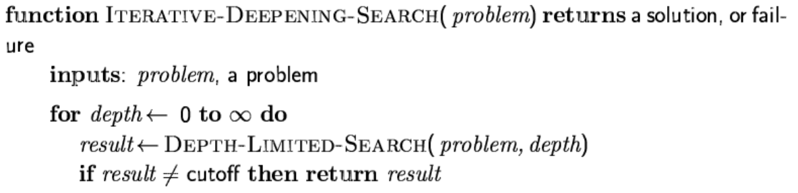

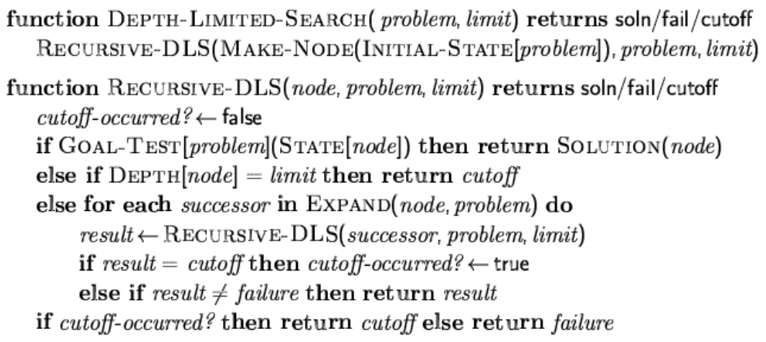

Add your implememtation as  `IDSearchAgentProgram` function (see the template in the `PS_agentPrograms.py`).



4. Determine the winner - the agent that achieved the goal and maintained the highest performance.

5. Implement the web-service to move the Satellite Agent step by step with an appropriate visualization of this process.

!!! Initially the Agent's performace is 50% of the number of nodes.